In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from jira import JIRA
import requests
import os
from datetime import date, timedelta, datetime

In [4]:
jira_username = os.environ['JIRA_USER']
jira_password = os.environ['JIRA_PASSWORD']
jira_url = os.environ['JIRA_SERVER']

jira_options = {'server': jira_url}
jira = JIRA(options=jira_options, basic_auth=(jira_username, jira_password))

In [19]:
def get_users_from_jira():
    sanity_cases_users = jira.search_issues("filter = 'Filter for Q3 Automation'", fields=['key', 'summary', 'assignee', 'status'], maxResults=200)
    dt = {
    'summary': [],
    'status': [],
    'assignee': []
    }
    idx = []

    for case in sanity_cases_users:
        idx.append(case)
        dt['summary'].append(case.fields.summary)
        dt['status'].append(case.fields.status)
        dt['assignee'].append(case.fields.assignee)
    
    sanity_cases_users = pd.DataFrame(dt, index=idx)
    sanity_cases_users['status'] = sanity_cases_users['status'].astype(str)
    return sanity_cases_users    

In [6]:
sanity_cases = jira.search_issues("filter = 'Filter for Q3 Automation' AND labels = Sanity", fields=['key', 'summary', 'assignee', 'status'], maxResults=100)

In [51]:
data = {
    'summary': [],
    'status': [],
    'assignee': []
}
index = []

for c in sanity_cases:
    index.append(c)
    data['summary'].append(c.fields.summary)
    data['status'].append(c.fields.status)
    data['assignee'].append(c.fields.assignee)
    
sanity_cases_frame = pd.DataFrame(data, index=index)

# sanity_cases_frame
sanity_cases_frame['status'] = sanity_cases_frame['status'].astype(str)
sanity_cases_frame
# print(sanity_cases_frame.dtypes)

,summary,status,assignee
HES-4335,Profiles - Switch your profile,Done,Vishwanand Upadhyay
HES-4331,Profiles - Profile Renaming across different p...,In Progress,Aiswariya Byju (infosys)
HES-4330,Profiles - Delete an existing profile,Done,Sukanya Dutta (Infosys)
HES-4329,REPLAY: Verify Watchlist events,Done,Lerin Lorance (Infosys)
HES-4324,ReplayTV- Playout from Search results,Done,Anuj Teotia
HES-4323,ReplayTV- Playout from Channel bar,Done,Anuj Teotia
HES-4310,Picture in Picture functionality for Replay,In Review,Anuj Teotia
HES-4309,Picture in Picture functionality for VOD,In Progress,Vivek Mishra
HES-4308,Picture in Picture functionality for LTV,In Review,Vishwanand Upadhyay
HES-4307,VOD Functinality for already Purchased asset -...,In Review,Vivek Mishra


In [52]:
print(len(sanity_cases_frame.index))
copy_sanity = sanity_cases_frame.copy()
print(len(copy_sanity.index))
copy_sanity
t = copy_sanity[copy_sanity.status == 'Done']
t

61
61


,summary,status,assignee
HES-4335,Profiles - Switch your profile,Done,Vishwanand Upadhyay
HES-4330,Profiles - Delete an existing profile,Done,Sukanya Dutta (Infosys)
HES-4329,REPLAY: Verify Watchlist events,Done,Lerin Lorance (Infosys)
HES-4324,ReplayTV- Playout from Search results,Done,Anuj Teotia
HES-4323,ReplayTV- Playout from Channel bar,Done,Anuj Teotia
HES-2867,Profiles - Profile creation wizard - Naming th...,Done,Vishwanand Upadhyay
HES-2825,Replay TV Catalogue - Play an Asset and Watch ...,Done,Anuj Teotia
HES-852,Search : Behaviour of Contextual Main Menu,Done,Sushma Sangondimath (Infosys)
HES-849,Apps: Behaviour of Contextual Main Menu,Done,Deepak Sharma (Infosys)
HES-673,LTV : Channel Zapping,Done,Deepak Sharma (Infosys)


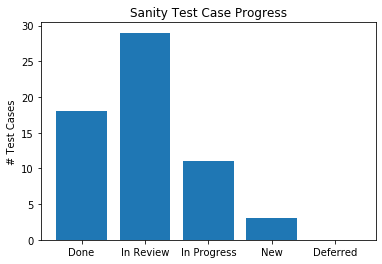

In [53]:
statuses = ['Done', 'In Review', 'In Progress', 'New', 'Deferred']
nums = []
for s in statuses:
    tmp_df = sanity_cases_frame.copy()
    tmp_df = tmp_df[tmp_df['status'] == s] 
    nums.append(len(tmp_df.index))

# sanity_cases_frame
y_pos = np.arange(len(statuses))
# plt.bar(y_pos, nums, align='center')
plt.xticks(y_pos, statuses)
plt.ylabel('# Test Cases')
plt.title('Sanity Test Case Progress')
plt.bar(y_pos, nums, align='center')
# plt.show()
plt.savefig('barchart.png')

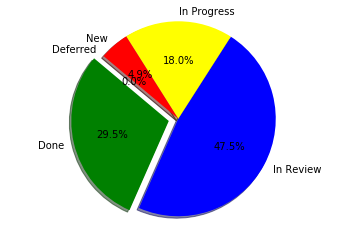

In [54]:
explode = (0.1,0,0,0,0)
colors = ['green', 'blue', 'yellow', 'red', 'grey']
plt.pie(nums, labels=statuses, explode=explode, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')
plt.savefig('pie.png')
plt.show()

In [20]:
tmp = get_users_from_jira()
tmp = tmp.assignee
assignees = list(set(tmp.tolist()))


def get_name(obj):
    if obj is not None:
        return obj.displayName

usernames = map(get_name, assignees)
for n in usernames:
    print(n)




Vikshith Bisilahalli Vishwanath (Infosys)
Aiswariya Byju (infosys)
Sushma Sangondimath (Infosys)
Deepthi Mariam Thomas
Vivek Mishra
Praveen Rao
Leya Abraham (Infosys)
Satya Damry
Tenkayala Thulasi (Infosys)
Amal Philip
Glisa Varghese (Infosys)
Shyleen Rodrigues (infosys)
Sukanya Dutta (Infosys)
Raghavendra Gangadhara
None
Shanmuga Priyan Mohan
Vignesh B12 (Infosys)
Anuj Teotia
Deepak Sharma (Infosys)
Akampan Dey (Infosys)
Shilpa Thorat
Vasanthamohan Subramani
Lerin Lorance (Infosys)
Pruthvika Gugri (Infosys)
Fernando Cobos
Vishwanand Upadhyay
Harikesh Oothrayil Sreekanthan
